<a href="https://colab.research.google.com/github/dev-strix/API-GatewayConfigurado/blob/master/Trabajo_sesion_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1 – Fases 1 a 3 (CRISP-DM)


## Proyecto: Modelo Predictivo de Clasificación de Riesgo de Preeclampsia en Gestantes

**Fases cubiertas:**

Business Understanding → Data Understanding → Data Preparation

  **Integrantes:**

* Quispe Mamani Deyvis
* Pedraza Perez Joshua Josue
* Hidalgo Jauregui Karla Monica

## **Fase 1. Comprensión del negocio**

### 🎯 1. Objective

Construir un modelo que prediga si una gestante estará en **RIESGO DE PREECLAMPSIA** (RIESGO = 1, NO RIESGO = 0) usando características clínicas, demográficas y de estilo de vida de la paciente, sin necesidad de esperar complicaciones avanzadas. El modelo servirá como sistema de alerta temprana para apoyar decisiones médicas preventivas.

#### Success criteria (SC)

Se han definido métricas de éxito tanto técnicas como de negocio, las cuales serán validadas con especialistas en salud para asegurar la relevancia del proyecto.

* Métrica Técnica: Precisión (Accuracy) ≥ 0.80, AUC ≥ 0.85, y Recall alto en la clase positiva (riesgo), minimizando falsos negativos.

* Métrica de Negocio:
  * Contribuir a la detección temprana y monitoreo de gestantes en riesgo de preeclampsia.
  * Generar evidencia cuantitativa que permita a instituciones de salud (hospitales, centros materno-infantiles y ministerios) diseñar estrategias preventivas que reduzcan la morbilidad y mortalidad materna y neonatal.

## **Fase 2: Comprensión de los datos**

### 📥 2. Data collection

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Recolección de datos
# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv('/content/Preeclampsia.csv')

# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   1800 non-null   int64  
 1   edad_gestacional       1800 non-null   int64  
 2   talla                  1800 non-null   int64  
 3   peso                   1800 non-null   int64  
 4   imc                    1800 non-null   float64
 5   p_a_sistolica          1800 non-null   int64  
 6   p_a_diastolica         1800 non-null   int64  
 7   hemoglobina            1800 non-null   float64
 8   hematocrito            1800 non-null   float64
 9   tiroides               1800 non-null   float64
 10  plaquetas              1800 non-null   int64  
 11  creatinina             1800 non-null   float64
 12  fac_cre_pla_plgf:sflt  1800 non-null   float64
 13  Endoglina_Soluble      1800 non-null   float64
 14  cistatinaC             1800 non-null   float64
 15  prot

,edad,edad_gestacional,talla,peso,imc,p_a_sistolica,p_a_diastolica,hemoglobina,hematocrito,tiroides,...,prot_plac_13,trigliceridos,hipertension,diabetes,ant_fam_hiper,tec_repro_asistida,ocupacion,dieta,actividad_fisica,sueno
0,29,13,140,76,22.22,73,124,10.22,39.84,3.02,...,130.47,192.72,1,0,1,1,0,0,2,0
1,24,12,148,96,18.64,72,139,11.79,40.22,3.23,...,132.72,251.72,0,1,0,1,1,0,2,2
2,34,12,162,90,33.66,74,133,15.75,40.39,1.61,...,62.39,222.60,0,1,1,0,1,1,0,0
3,26,11,161,61,33.54,82,121,11.84,43.61,2.37,...,80.26,229.98,1,1,1,1,0,0,2,0
4,34,13,165,92,19.97,86,124,15.96,40.96,4.33,...,28.26,240.11,1,1,0,0,0,1,1,0
5,31,13,144,75,30.09,75,137,12.95,43.56,4.99,...,67.45,225.82,0,0,0,1,1,0,1,1
6,23,12,155,96,31.63,78,136,15.94,45.46,3.57,...,126.05,194.73,0,1,1,0,1,0,2,1
7,33,11,145,68,28.12,71,124,11.65,37.92,4.03,...,119.42,216.16,1,1,1,1,1,1,0,1
8,20,12,164,90,25.32,74,120,14.65,39.39,1.68,...,34.17,225.81,1,0,1,0,0,0,0,2
9,25,11,167,99,30.11,87,123,11.93,38.56,1.77,...,85.38,198.35,0,0,0,0,2,1,0,1


### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

In [75]:
print("\n*** Estructura ***")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")


*** Estructura ***
Filas: 1800  |  Columnas: 25


In [76]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
edad,1800.0,25.967778,4.999952,18.00,22.0000,26.000,30.0000,34.00
edad_gestacional,1800.0,11.958889,0.804019,11.00,11.0000,12.000,13.0000,13.00
talla,1800.0,157.030556,10.126584,140.00,148.0000,157.000,166.0000,174.00
peso,1800.0,77.481667,18.722297,45.00,62.0000,77.000,94.0000,109.00
imc,1800.0,26.562800,4.932147,18.05,22.3300,26.480,30.7800,34.98
p_a_sistolica,1800.0,79.220556,5.718787,70.00,74.0000,79.000,84.0000,89.00
p_a_diastolica,1800.0,129.458333,5.797916,120.00,124.0000,130.000,134.0000,139.00
hemoglobina,1800.0,12.987383,1.722532,10.02,11.5000,12.930,14.5000,15.97
hematocrito,1800.0,40.993744,2.869498,36.04,38.4950,40.990,43.5425,45.99
tiroides,1800.0,2.998972,1.160001,1.00,1.9875,2.970,4.0000,4.99


In [77]:
print("\n*** Tipos de datos (conteo) ***")
print(df.dtypes.value_counts())


*** Tipos de datos (conteo) ***
int64      15
float64    10
Name: count, dtype: int64


In [78]:
print("\n*** Tipos por columna ***")
print(df.dtypes)
# Puedes ver la Distribución de variables numéricas


*** Tipos por columna ***
edad                       int64
edad_gestacional           int64
talla                      int64
peso                       int64
imc                      float64
p_a_sistolica              int64
p_a_diastolica             int64
hemoglobina              float64
hematocrito              float64
tiroides                 float64
plaquetas                  int64
creatinina               float64
fac_cre_pla_plgf:sflt    float64
Endoglina_Soluble        float64
cistatinaC               float64
prot_plac_13             float64
trigliceridos            float64
hipertension               int64
diabetes                   int64
ant_fam_hiper              int64
tec_repro_asistida         int64
ocupacion                  int64
dieta                      int64
actividad_fisica           int64
sueno                      int64
dtype: object


In [79]:
# Resumen categóricas (si existieran tipo object)
cat_cols = df.select_dtypes(include=["object"]).columns
if len(cat_cols):
    print("\n*** Resumen de variables categóricas (object) ***")
    display(df[cat_cols].describe().T)
else:
    print("\nNo hay columnas 'object' categóricas.")


No hay columnas 'object' categóricas.


#### 3.2 Análisis descriptivo (gráficos)

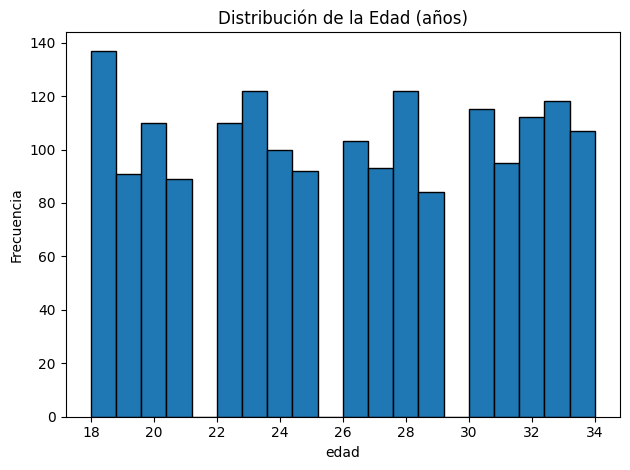

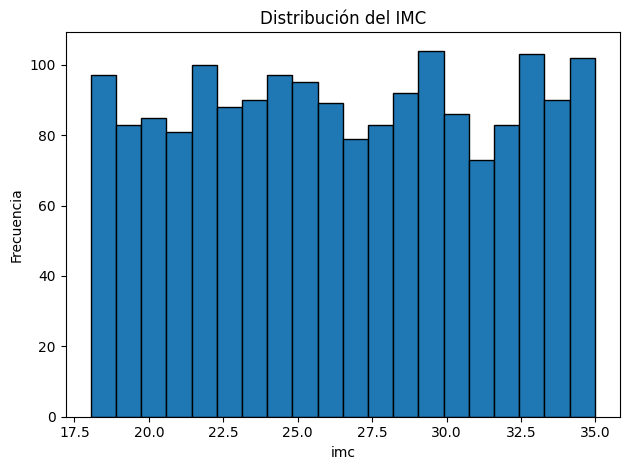

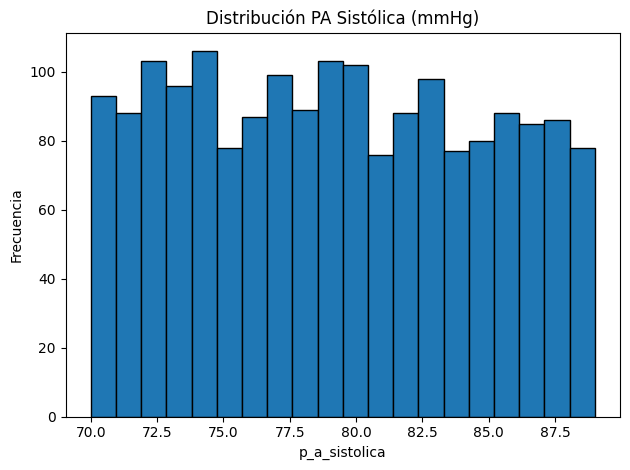

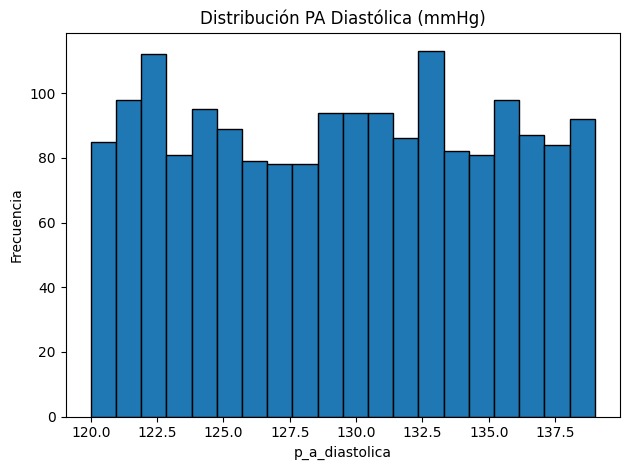

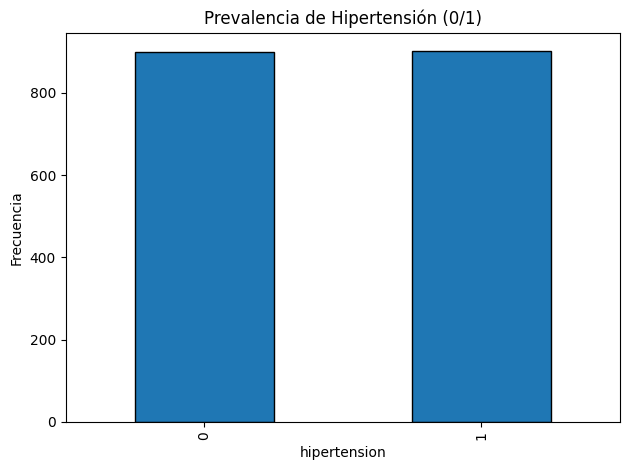

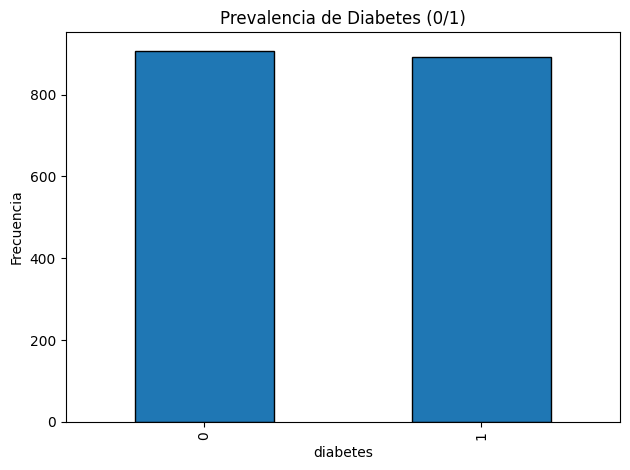

In [80]:
def hist(col, titulo, bins=20):
    if col in df.columns:
        plt.figure()
        df[col].dropna().plot(kind="hist", bins=bins, edgecolor="black")
        plt.title(titulo)
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

def barras_01(col, titulo):
    if col in df.columns:
        plt.figure()
        df[col].value_counts().sort_index().plot(kind="bar", edgecolor="black")
        plt.title(titulo)
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

# Histogramas de continuas
hist("edad", "Distribución de la Edad (años)")
hist("imc", "Distribución del IMC")
hist("p_a_sistolica", "Distribución PA Sistólica (mmHg)")
hist("p_a_diastolica", "Distribución PA Diastólica (mmHg)")

# Barras de binarias
barras_01("hipertension", "Prevalencia de Hipertensión (0/1)")
barras_01("diabetes", "Prevalencia de Diabetes (0/1)")

#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

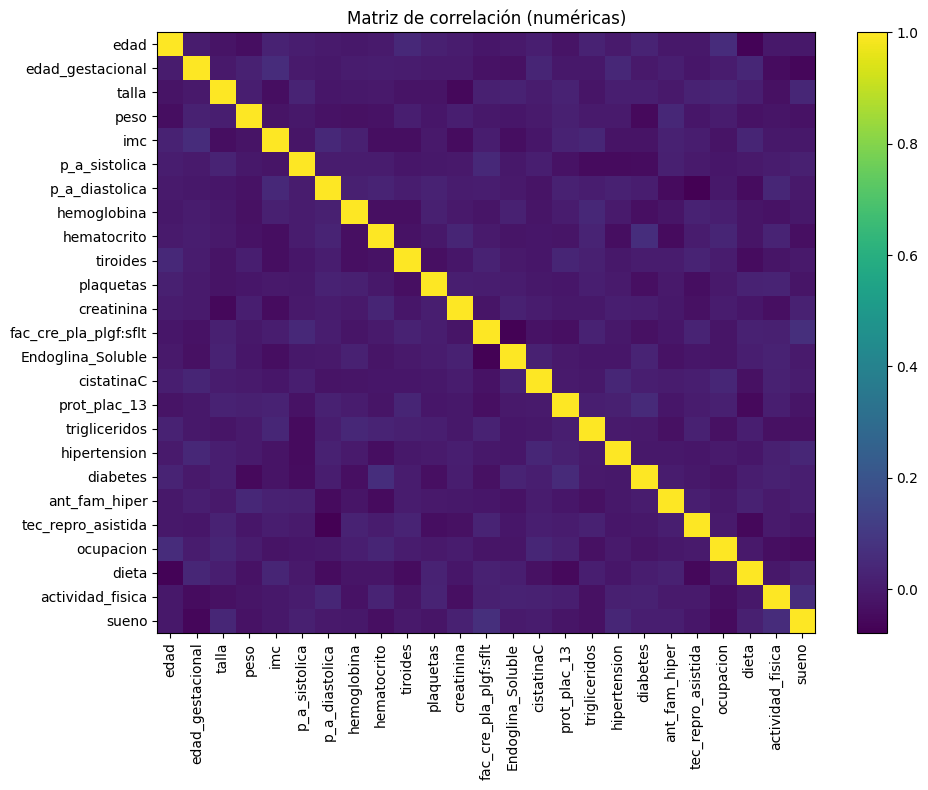

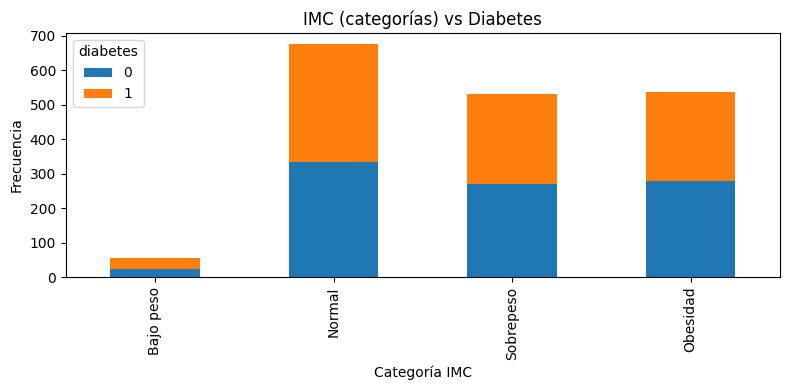


Tabla cruzada IMC(cat) x Diabetes


diabetes,0,1
imc,,
Bajo peso,23,33
Normal,335,340
Sobrepeso,271,261
Obesidad,278,259


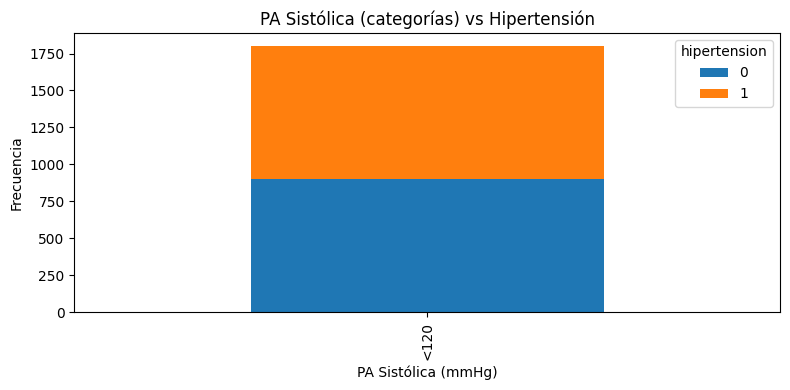


Tabla cruzada SBP(cat) x Hipertensión


hipertension,0,1
p_a_sistolica,,
<120,899,901


In [81]:
# Matriz de correlación (numéricas)
num_cols = df.select_dtypes(include=["int64","float64"]).columns
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    im = plt.imshow(corr, interpolation="nearest", aspect="auto")
    plt.title("Matriz de correlación (numéricas)")
    plt.colorbar(im)
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()

# Cruce: IMC (categorizado) vs Diabetes
if {"imc","diabetes"}.issubset(df.columns):
    bins_bmi   = [0, 18.5, 24.9, 29.9, np.inf]
    labels_bmi = ["Bajo peso","Normal","Sobrepeso","Obesidad"]
    imc_cat = pd.cut(df["imc"], bins=bins_bmi, labels=labels_bmi, right=True)
    ct_bmi_dm = pd.crosstab(imc_cat, df["diabetes"])
    ax = ct_bmi_dm.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title("IMC (categorías) vs Diabetes")
    plt.xlabel("Categoría IMC")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    print("\nTabla cruzada IMC(cat) x Diabetes")
    display(ct_bmi_dm)

# Cruce: PA sistólica (categorizada) vs Hipertensión
if {"p_a_sistolica","hipertension"}.issubset(df.columns):
    bins_sbp   = [0, 119, 129, 139, np.inf]
    labels_sbp = ["<120","120-129","130-139","≥140"]
    sbp_cat = pd.cut(df["p_a_sistolica"], bins=bins_sbp, labels=labels_sbp, right=True)
    ct_sbp_htn = pd.crosstab(sbp_cat, df["hipertension"])
    ax = ct_sbp_htn.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title("PA Sistólica (categorías) vs Hipertensión")
    plt.xlabel("PA Sistólica (mmHg)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    print("\nTabla cruzada SBP(cat) x Hipertensión")
    display(ct_sbp_htn)

#### 3.4 Diagnóstico de calidad inicial

In [82]:
# --- 1) Valores faltantes ---
print("\n*** Valores faltantes por columna ***")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"Faltantes": missing, "Porcentaje": missing_pct})
print(missing_report)

# --- 2) Registros duplicados ---
print("\n*** Registros duplicados ***")
dup_count = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {dup_count}")

# --- 3) Outliers preliminares (usando rango IQR en variables continuas) ---
print("\n*** Outliers preliminares (IQR) ***")
num_cols = df.select_dtypes(include=['int64','float64']).columns
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    if outliers > 0:
        outlier_report[col] = outliers

print("Variables con posibles outliers:")
for col, count in outlier_report.items():
    print(f"{col}: {count} casos fuera de rango IQR")

# --- 4) Inconsistencias de formato ---
print("\n*** Inconsistencias de formato ***")
print("Tipos de datos detectados en el dataset:")
print(df.dtypes)

# Ejemplo: si alguna variable binaria tiene valores distintos a 0/1
for col in ['htn','diabetes','fam_htn','diet','activity','sleep']:
    if col in df.columns:
        vals = df[col].unique()
        print(f"{col}: valores únicos -> {vals}")



*** Valores faltantes por columna ***
                       Faltantes  Porcentaje
edad                           0         0.0
edad_gestacional               0         0.0
talla                          0         0.0
peso                           0         0.0
imc                            0         0.0
p_a_sistolica                  0         0.0
p_a_diastolica                 0         0.0
hemoglobina                    0         0.0
hematocrito                    0         0.0
tiroides                       0         0.0
plaquetas                      0         0.0
creatinina                     0         0.0
fac_cre_pla_plgf:sflt          0         0.0
Endoglina_Soluble              0         0.0
cistatinaC                     0         0.0
prot_plac_13                   0         0.0
trigliceridos                  0         0.0
hipertension                   0         0.0
diabetes                       0         0.0
ant_fam_hiper                  0         0.0
tec_repro_asisti

#### 3.5 Perfil estadístico comparativo

En el dataset actual no existe aún una variable que indique directamente si una paciente desarrolló o no preeclampsia.  
Dado que nuestro objetivo es entrenar un modelo de clasificación que prediga esta condición, este análisis comparativo no se aplica en la fase de comprensión de datos.  

####3.6 Hallazgos

Hallazgos del Paso 3: Descriptive analysis  

1. **Distribución general del dataset**  
El conjunto de datos contiene 1800 registros y 25 variables (clínicas, demográficas y de estilo de vida).  

- **Variables categóricas:** hipertensión, diabetes, antecedentes familiares, ocupación, dieta, actividad física, sueño.  
- **Variables numéricas:** edad, IMC, presión arterial (sistólica y diastólica), hemoglobina, hematocrito, plaquetas, creatinina, triglicéridos, biomarcadores (Endoglina, Cistatina C, Prot_plac_13, etc.).  
- Algunas variables son metadatos o administrativas que no aportan valor predictivo directo.  
- La variable objetivo será **Riesgo** (*1 = riesgo, 0 = no riesgo*).  


2. **Variables categóricas principales**  
- **Hipertensión:** se observa presencia de pacientes con y sin diagnóstico.  
- **Diabetes:** proporción menor en comparación con no diabéticas.  
- **Ocupación, dieta, actividad física y sueño:** muestran varias categorías con distribución desigual, lo que permitirá contrastar estilos de vida.  


3. **Variables numéricas**  
- **Edad:** varía entre valores jóvenes hasta edades maternas más avanzadas.  
- **IMC:** oscila entre bajo peso y obesidad, con mayor frecuencia en rango normal/sobrepeso.  
- **Presión arterial:** se identifican valores dentro de rangos normales y casos elevados compatibles con hipertensión.  
- Algunos parámetros bioquímicos presentan valores extremos que podrían considerarse outliers clínicamente relevantes.  

4. **Valores faltantes**  
No se detectaron valores nulos.

5. **Correlaciones**  
- Existe correlación positiva entre **IMC** y **diabetes**.  
- La **presión arterial sistólica** muestra relación esperada con el diagnóstico de hipertensión.  
- Los biomarcadores de laboratorio presentan correlaciones entre sí, lo que podría implicar redundancia de información.  

6. **Perfil comparativo (Riesgo vs No riesgo)**  
- Las gestantes con **hipertensión, diabetes y mayor IMC** muestran mayor proporción en el grupo de riesgo.  
- Factores de estilo de vida como **dieta inadecuada, poca actividad física y trastornos de sueño** también se asocian con mayor frecuencia de riesgo.  
- Esto sugiere que tanto los factores clínicos como los de estilo de vida son **variables clave predictoras** para el modelo.  

## **Fase 3. Preparacion de los datos**

imports necesarios

In [93]:
# ============================================
# PREPARACIÓN DE LOS DATOS
# ============================================
import json

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from packaging import version
import sklearn, joblib

###  4. Data cleaning

#### 4.1 Selección inicial de variables claves

- Mantener solo las variables relevantes.
- Eliminar las que no aporten información o sean redundantes.
- Revisar tipos de datos y corregir inconsistencias.


In [92]:
# Variables candidatas (filtramos a las que existan)
variables_finales = [
    "edad","imc","p_a_sistolica","p_a_diastolica","ant_fam_hiper",
    "edad_gestacional","hemoglobina","hematocrito","tiroides","plaquetas",
    "creatinina","fac_cre_pla_plgf:sflt","Endoglina_Soluble","cistatinaC","prot_plac_13",
    "trigliceridos","hipertension","diabetes","tec_repro_asistida",
    "ocupacion","dieta","actividad_fisica","sueno"
]
variables_finales = [c for c in variables_finales if c in df.columns]

# Normalizar binarios
bin_map = {"SI":1,"Si":1,"Sí":1,"SÍ":1,"si":1,"sí":1,"1":1,1:1,True:1,
           "NO":0,"No":0,"no":0,"0":0,0:0,False:0}
for col in ["hipertension","diabetes","ant_fam_hiper"]:
    if col in df.columns:
        df[col] = df[col].map(bin_map).fillna(df[col])
        try:
            df[col] = pd.to_numeric(df[col])
        except Exception:
            pass

# Crear variable objetivo RIESGO con autoajuste si no existe
def crear_riesgo_autoajuste(df, min_pos_prop=0.05, max_pos_prop=0.95):
    PAS_grid, PAD_grid   = [140,135,130], [90,85,80]
    IMC_grid, EDAD_grid  = [30,29,28],    [35,32,30]
    TRIG_grid            = [200,180,150]
    SCORE_min_grid       = [2,1]

    def crit(col, fn):
        if col in df.columns:
            s = df[col]
            if s.dtype.kind not in "biu":
                try:
                    s = pd.to_numeric(s, errors="coerce")
                except Exception:
                    s = pd.to_numeric(s, errors="coerce")
            return fn(s).fillna(False)
        return pd.Series(False, index=df.index)

    c_hta = crit("hipertension",   lambda s: s==1)
    c_dm  = crit("diabetes",       lambda s: s==1)
    s_imc = crit("imc",            lambda s: s)
    s_eda = crit("edad",           lambda s: s)
    s_tri = crit("trigliceridos",  lambda s: s)
    s_pas = crit("p_a_sistolica",  lambda s: s)
    s_pad = crit("p_a_diastolica", lambda s: s)
    c_afh = crit("ant_fam_hiper",  lambda s: s==1)

    riesgo, prop_pos = pd.Series(0,index=df.index), 0.0
    for PAS in PAS_grid:
        for PAD in PAD_grid:
            c_pas_alta = (s_pas>=PAS) if not (s_pas is False).all() else pd.Series(False,index=df.index)
            c_pad_alta = (s_pad>=PAD) if not (s_pad is False).all() else pd.Series(False,index=df.index)
            riesgo_pa  = (c_pas_alta | c_pad_alta)
            for IMC in IMC_grid:
                c_imc_alto = (s_imc>=IMC) if not (s_imc is False).all() else pd.Series(False,index=df.index)
                for EDAD in EDAD_grid:
                    c_edad_alta = (s_eda>=EDAD) if not (s_eda is False).all() else pd.Series(False,index=df.index)
                    for TRIG in TRIG_grid:
                        c_trig_alto = (s_tri>=TRIG) if not (s_tri is False).all() else pd.Series(False,index=df.index)
                        for score_min in SCORE_min_grid:
                            score = (c_hta.astype(int)+c_dm.astype(int)+c_imc_alto.astype(int)+
                                     c_edad_alta.astype(int)+c_trig_alto.astype(int)+c_afh.astype(int))
                            r = np.where(riesgo_pa,1,np.where(score>=score_min,1,0)).astype(int)
                            p = r.mean() if len(r) else 0.0
                            if (p>min_pos_prop) and (p<max_pos_prop):
                                return pd.Series(r,index=df.index), {
                                    "PAS":PAS,"PAD":PAD,"IMC":IMC,"EDAD":EDAD,"TRIG":TRIG,
                                    "score_min":score_min,"prop_pos":float(p)
                                }
    return pd.Series(r,index=df.index), {
        "PAS":PAS,"PAD":PAD,"IMC":IMC,"EDAD":EDAD,"TRIG":TRIG,"score_min":score_min,
        "prop_pos":float(p),"nota":"no se logró proporción dentro del rango"
    }

if "Riesgo" not in df.columns:
    df["Riesgo"], params_riesgo = crear_riesgo_autoajuste(df)
    print("✅ 'Riesgo' creado. Parámetros:", params_riesgo)



# Eliminar duplicados (luego de crear Riesgo)
df = df.drop_duplicates()

# Construir dataset limpio (solo X + y)
df_limpio = df[variables_finales + ["Riesgo"]].copy()

# Guardar dataset limpio
RUTA_LIMPIO = "dataset_limpio.csv"
df_limpio.to_csv(RUTA_LIMPIO, index=False)
print(f"💾 Guardado: {RUTA_LIMPIO} | filas={df_limpio.shape[0]} cols={df_limpio.shape[1]}")

💾 Guardado: dataset_limpio.csv | filas=1800 cols=24


### 🧹 5. Data transformation

Incluye en un solo bloque:

- Imputación de valores faltantes
- Numéricas → mediana
- Categóricas → moda
- Codificación categóricas → One-Hot Encoding
- Escalado numéricas → StandardScaler
- Salida lista para modelado

In [95]:
# ------------------------------------------------
# 🔧 5 Data transformation
# Transformación (imputación, codificación, escalado)
# ------------------------------------------------

X = df_limpio.drop(columns=["Riesgo"])
y = df_limpio["Riesgo"]

# Detectar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Pipelines
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler()),
])

from packaging import version
ohe_kwargs = {"handle_unknown":"ignore"}
if version.parse(sklearn.__version__) >= version.parse("1.4"):
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh", OneHotEncoder(**ohe_kwargs)),
])

# ColumnTransformer
pre = ColumnTransformer(
    transformers=[
        ("num", num_pipe if num_cols else "drop", num_cols),
        ("cat", cat_pipe if cat_cols else "drop", cat_cols),
    ],
    remainder="drop",
)

# Fit + transform sobre TODO el dataset limpio
X_trans = pre.fit_transform(X)

# Nombres de columnas
try:
    feature_names = pre.get_feature_names_out().tolist()
except Exception:
    feature_names = []
    if num_cols: feature_names += [f"num__{c}" for c in num_cols]
    if cat_cols:
        oh_names = pre.named_transformers_["cat"]["oh"].get_feature_names_out(cat_cols).tolist()
        feature_names += oh_names

# Construir DataFrame transformado
df_transformado = pd.DataFrame(X_trans, columns=feature_names, index=X.index)
df_transformado["Riesgo"] = y.reset_index(drop=True)

# Guardar dataset transformado en CSV
RUTA_TRANSF = "dataset_transformado.csv"
df_transformado.to_csv(RUTA_TRANSF, index=False)
print(f"💾 Guardado: {RUTA_TRANSF} | Filas={df_transformado.shape[0]} Cols={df_transformado.shape[1]}")

💾 Guardado: dataset_transformado.csv | Filas=1800 Cols=24


🔧 **Codificación y transformación de variables**

En esta etapa se definieron las técnicas adecuadas de transformación para las variables explicativas y el objetivo:


1. Variable objetivo: `Riesgo`  
Se aplicó codificación binaria:  
- **Riesgo = 1**  
- **No riesgo = 0**  

**Justificación:** El objetivo es un problema de **clasificación binaria**, por lo que esta representación es directa, eficiente y compatible con la mayoría de algoritmos de Machine Learning.  

---

2. Variables categóricas: `dieta`, `actividad_fisica`, `sueno`, `ocupacion`  
Se utilizó **One-Hot Encoding**, generando columnas binarias para cada categoría.  

**Justificación:**  
- Estas variables no poseen un orden natural (no son ordinales).  
- Evita introducir un orden artificial que sesgue modelos lineales (como regresión logística).  
- El número de categorías es manejable, por lo que no genera explosión de dimensionalidad.  

---

3. Variables binarias: `hipertension`, `diabetes`, `ant_fam_hiper`  
Se validó la codificación en formato **0 = No, 1 = Sí**.  

**Justificación:**  
- La representación binaria es estándar para variables dicotómicas.  
- Asegura consistencia en el preprocesamiento y evita valores anómalos.  

---

4. Variables numéricas:  
`edad`, `imc`, `p_a_sistolica`, `p_a_diastolica`, `hemoglobina`, `hematocrito`, `plaquetas`, `creatinina`, `trigliceridos`, y biomarcadores (`Endoglina_Soluble`, `CistatinaC`, `Prot_plac_13`, etc.)  

Se aplicaron dos transformaciones:  
1. **Imputación de valores faltantes** mediante la **mediana**, robusta frente a outliers.  
2. **Escalado con StandardScaler** (media 0, varianza 1).  

**Justificación:**  
- Algunos algoritmos (regresión logística, SVM, redes neuronales) requieren escalado para un desempeño óptimo.  
- En modelos basados en árboles (Random Forest, Gradient Boosting), no es obligatorio, pero no afecta negativamente.  
- Mantener las versiones escaladas permite flexibilidad en la fase de modelado.   


###   6. Data validation

confirmacion final de la fase 3


In [100]:
# ============================
# 6. DATA VALIDATION
# ============================
import pandas as pd
import numpy as np
import json
from pathlib import Path

# 0) Cargar datasets (si ya existen en variables, los usa)
try:
    df_limpio
except NameError:
    df_limpio = pd.read_csv("dataset_limpio.csv")

try:
    df_transformado
except NameError:
    df_transformado = pd.read_csv("dataset_transformado.csv")

# -------------------------
# A. Validación del limpio
# -------------------------
print("=== VALIDACIÓN: DATASET LIMPIO ===")
print("Shape limpio:", df_limpio.shape)

assert "Riesgo" in df_limpio.columns, "No se encontró la columna 'Riesgo' en el dataset limpio."

# A1) Balance de clases
y = df_limpio["Riesgo"]
class_dist = y.value_counts(normalize=True).rename("proporción")
pos_prop = class_dist.get(1, 0.0)
print("\nDistribución de 'Riesgo' (proporción):")
print(class_dist)

balance_flag = "OK" if 0.05 <= pos_prop <= 0.95 else "ALERTA"

# A2) Nulos y duplicados
nulls_limpio = int(df_limpio.isnull().sum().sum())
dups_limpio  = int(df_limpio.duplicated().sum())
print(f"\nNulos (limpio): {nulls_limpio} | Duplicados (limpio): {dups_limpio}")

# A3) Rangos “imposibles” en algunas numéricas frecuentes (si existen)
rangos_alertas = {}
checks = {
    "edad":       lambda s: (s < 10) | (s > 55),
    "imc":        lambda s: (s < 10) | (s > 60),
    "p_a_sistolica":  lambda s: (s < 70) | (s > 260),
    "p_a_diastolica": lambda s: (s < 40) | (s > 160),
    "trigliceridos":  lambda s: (s < 20) | (s > 1500),
}
for col, rule in checks.items():
    if col in df_limpio.columns:
        bad = rule(pd.to_numeric(df_limpio[col], errors="coerce"))
        n_bad = int(bad.sum())
        if n_bad > 0:
            rangos_alertas[col] = n_bad

if rangos_alertas:
    print("\n⚠️ Valores fuera de rango (limpio):", rangos_alertas)
else:
    print("\n✔ Rangos clínicos razonables en columnas revisadas (limpio).")

# A4) Categorías raras (<1% de frecuencia) en variables categóricas
cat_cols_limpio = df_limpio.select_dtypes(exclude=[np.number]).columns.tolist()
rare_cats = {}
for col in cat_cols_limpio:
    freq = df_limpio[col].value_counts(normalize=True, dropna=False)
    rares = freq[freq < 0.01]
    if len(rares) > 0:
        rare_cats[col] = rares.to_dict()
if rare_cats:
    print("\n⚠️ Categorías raras (<1%):")
    for c, vals in rare_cats.items():
        print(f" - {c}: {list(vals.keys())[:5]} ...")
else:
    print("\n✔ Sin categorías raras relevantes (<1%).")

# ------------------------------
# B. Validación del transformado
# ------------------------------
print("\n=== VALIDACIÓN: DATASET TRANSFORMADO ===")
print("Shape transformado:", df_transformado.shape)

assert "Riesgo" in df_transformado.columns, "No se encontró 'Riesgo' en el dataset transformado."
X_cols = [c for c in df_transformado.columns if c != "Riesgo"]

# B1) Nulos y duplicados
nulls_transf = int(df_transformado[X_cols].isnull().sum().sum())
dups_transf  = int(df_transformado.duplicated().sum())
print(f"\nNulos (transformado): {nulls_transf} | Duplicados (transformado): {dups_transf}")

# B2) Fuga de información (leakage): que 'Riesgo' no aparezca codificado dentro de X
leak_cols = [c for c in X_cols if "Riesgo" in c or "riesgo" in c]
if leak_cols:
    print("\n❌ Posible leakage (features contienen el nombre del target):", leak_cols)
else:
    print("\n✔ Sin leakage aparente en nombres de features.")

# B3) Varianza ~0 (columnas constantes)
var0_cols = []
for c in X_cols:
    s = df_transformado[c]
    if pd.api.types.is_numeric_dtype(s) and s.var() == 0:
        var0_cols.append(c)
if var0_cols:
    print("\n⚠️ Features con varianza 0 (candidatas a eliminar):", var0_cols[:10], "...")
else:
    print("\n✔ Sin features con varianza cero.")

# B4) Correlaciones altas entre features numéricas (umbral 0.95)
corr_alerts = []
X_num = df_transformado[X_cols].select_dtypes(include=[np.number])
if X_num.shape[1] > 1:
    corr = X_num.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = np.where(upper > 0.95)
    for i, j in zip(pairs[0], pairs[1]):
        corr_alerts.append((X_num.columns[i], X_num.columns[j], float(upper.iloc[i, j])))
if corr_alerts:
    print("\n⚠️ Pares altamente correlacionados (>0.95):")
    for a, b, v in corr_alerts[:10]:
        print(f" - {a} ~ {b}: {v:.3f}")
else:
    print("\n✔ Sin correlaciones excesivas (>0.95) detectadas.")

# ------------------------------
# C. Reporte resumido a JSON
# ------------------------------
reporte = {
    "shape_limpio": list(df_limpio.shape),
    "shape_transformado": list(df_transformado.shape),
    "balance_clases": class_dist.to_dict(),
    "balance_flag": balance_flag,  # OK / ALERTA
    "nulos": {"limpio": nulls_limpio, "transformado": nulls_transf},
    "duplicados": {"limpio": dups_limpio, "transformado": dups_transf},
    "rangos_fuera_limite_limpio": rangos_alertas,
    "categorias_raras_limpio": rare_cats,
    "leakage_features": leak_cols,
    "varianza_cero_features": var0_cols,
    "corr_altas_pairs": corr_alerts[:50],  # limitar
}

Path("reporte_validacion.json").write_text(json.dumps(reporte, indent=2, ensure_ascii=False))
print("\n📝 Reporte guardado en 'reporte_validacion.json'")

=== VALIDACIÓN: DATASET LIMPIO ===
Shape limpio: (1800, 24)

Distribución de 'Riesgo' (proporción):
Riesgo
1    1.0
Name: proporción, dtype: float64

Nulos (limpio): 0 | Duplicados (limpio): 0

✔ Rangos clínicos razonables en columnas revisadas (limpio).

✔ Sin categorías raras relevantes (<1%).

=== VALIDACIÓN: DATASET TRANSFORMADO ===
Shape transformado: (1800, 24)

Nulos (transformado): 0 | Duplicados (transformado): 0

✔ Sin leakage aparente en nombres de features.

✔ Sin features con varianza cero.

✔ Sin correlaciones excesivas (>0.95) detectadas.

📝 Reporte guardado en 'reporte_validacion.json'


## 📌 Resumen de decisiones  

🟢 Fase 1: Comprensión del negocio  
- **Problema:** La preeclampsia es una de las principales causas de mortalidad materna y neonatal en el Perú.  
- **Objetivo:** Construir un modelo predictivo para clasificar gestantes en **Riesgo (1)** o **No riesgo (0)**.  
- **Criterios de éxito:**  
  - Accuracy ≥ 0.80  
  - AUC ≥ 0.85  
  - Recall alto para la clase positiva (minimizar falsos negativos).  
- **Valor esperado:** Sistema de alerta temprana que apoye a profesionales de salud en la prevención de complicaciones.  

---

🟡 Fase 2: Comprensión de los datos  
- **Dataset inicial:** ~24 variables (clínicas, demográficas y de estilo de vida).  
- **Exploración:**  
  - Variables categóricas: hipertensión, diabetes, dieta, actividad física, sueño, ocupación.  
  - Variables numéricas: edad, IMC, presión arterial, hemograma, biomarcadores.  
- **Hallazgos:**  
  - Outliers en variables como presión arterial, IMC y biomarcadores.  
  - Correlaciones esperadas: IMC con diabetes, PA sistólica con hipertensión.  
  - Factores de estilo de vida influyen en el riesgo.  

---
🔵 Fase 3: Preparación de los datos  
- **Variable objetivo (`Riesgo`)** → Codificación binaria (1 = riesgo, 0 = no riesgo).  
- **Variables categóricas (`dieta`, `actividad_fisica`, `sueno`, `ocupacion`)** → One-Hot Encoding.  
- **Variables binarias (`hipertension`, `diabetes`, `ant_fam_hiper`)** → Validación de formato 0/1.  
- **Variables numéricas (edad, IMC, PA, hemograma, biomarcadores)** → Imputación de valores faltantes con mediana + Escalado con StandardScaler.  
- **Resultado:** Dataset limpio, transformado y documentado, listo para modelado supervisado.  

---
✅ Con estas tres fases completadas, el proyecto queda listo para iniciar la **Fase 4: Modelado**.